In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle

In [0]:
X_train = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train.p', 'rb'))
y_train = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_train.p', 'rb'))
X_test  = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test.p', 'rb'))
y_test  = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_test.p', 'rb'))
X_dev   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev.p', 'rb'))
y_dev   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/y_dev.p', 'rb'))

In [0]:
X_train_arima_0_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_0_0_1.p', 'rb'))
X_test_arima_0_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_0_0_1.p', 'rb'))
X_dev_arima_0_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_0_0_1.p', 'rb'))
X_train_arima_0_0_2   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_0_0_2.p', 'rb'))
X_test_arima_0_0_2   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_0_0_2.p', 'rb'))
X_dev_arima_0_0_2   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_0_0_2.p', 'rb'))
X_train_arima_1_0_0   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_1_0_0.p', 'rb'))
X_test_arima_1_0_0   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_1_0_0.p', 'rb'))
X_dev_arima_1_0_0   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_1_0_0.p', 'rb'))

In [0]:
X_train_arima_1_0_1   = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_1_0_1.p', 'rb'))
# Load MOA data
X_gb_events = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_gb_events.p', 'rb'))

In [0]:
# X_train_aug = np.maximum(0,np.log(X_train))
# X_test_aug = np.maximum(0,np.log(X_test))
# X_dev_aug = np.maximum(0,np.log(X_dev))

In [0]:
# X_train_aug.shape

In [0]:
X_train.shape, X_test.shape, X_dev.shape

((500, 1000, 1), (100, 1000, 1), (100, 2000, 1))

In [0]:
# plt.plot(np.maximum(0,np.log(X_train[0,:,0])-1))

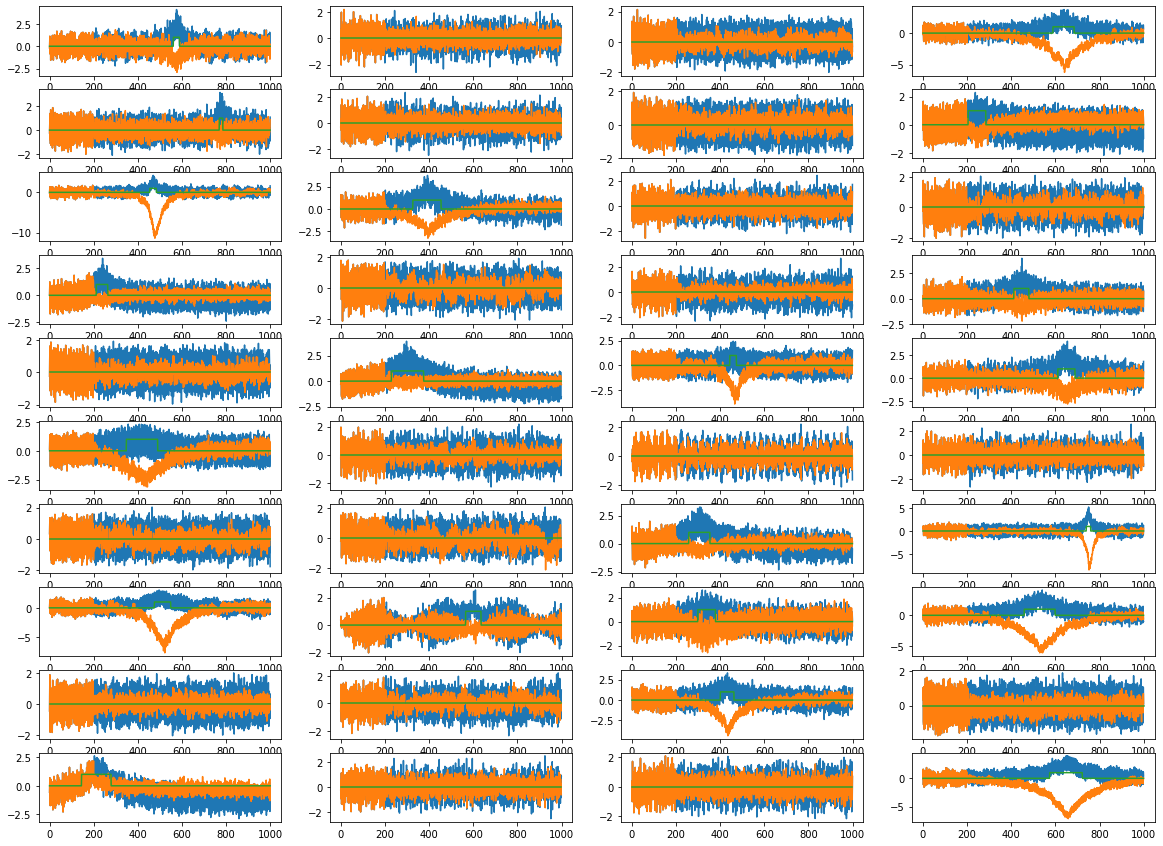

In [0]:
import matplotlib.pyplot as plt
# Plot generated graphs.
plt.figure(figsize=(20,15))

for i in range(40):
    plt.subplot(10,4,i+1)
    plt.plot(X_train[i,:,0])
    plt.plot(X_train_arima_0_0_2[i,:,0])
    # plt.plot(X_train[i,:,0]-X_train_arima_0_0_2[i,:,0])
    # plt.plot(np.maximum(0,np.log(X_train[i,:,0])))
    plt.plot(y_train[i])

plt.show()

In [0]:
import itertools
import numpy as np
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')

def plot_data(X, y_label=None, y_pred=None, rows=5, cols=4):
    """Plot the light curve and the associated label. Trims zeroes in X"""
    plot=plt.figure(figsize=(rows * 4, 15))
    for i in range(rows * cols):
        plt.subplot(rows,cols,i+1)
        last_nonzero = np.max(np.nonzero(X[i,:,0]))
        plt.plot(X[i,:last_nonzero,0], '#a0a0a0', label='Light Curve')
        if y_pred is not None:
            plt.plot(y_pred[i,:last_nonzero], 'b', label='Prediction')
        if y_label is not None:
            plt.plot(y_label[i,:last_nonzero], 'r', label='Label')            
        if i == 0:
            plt.legend()

    return plot

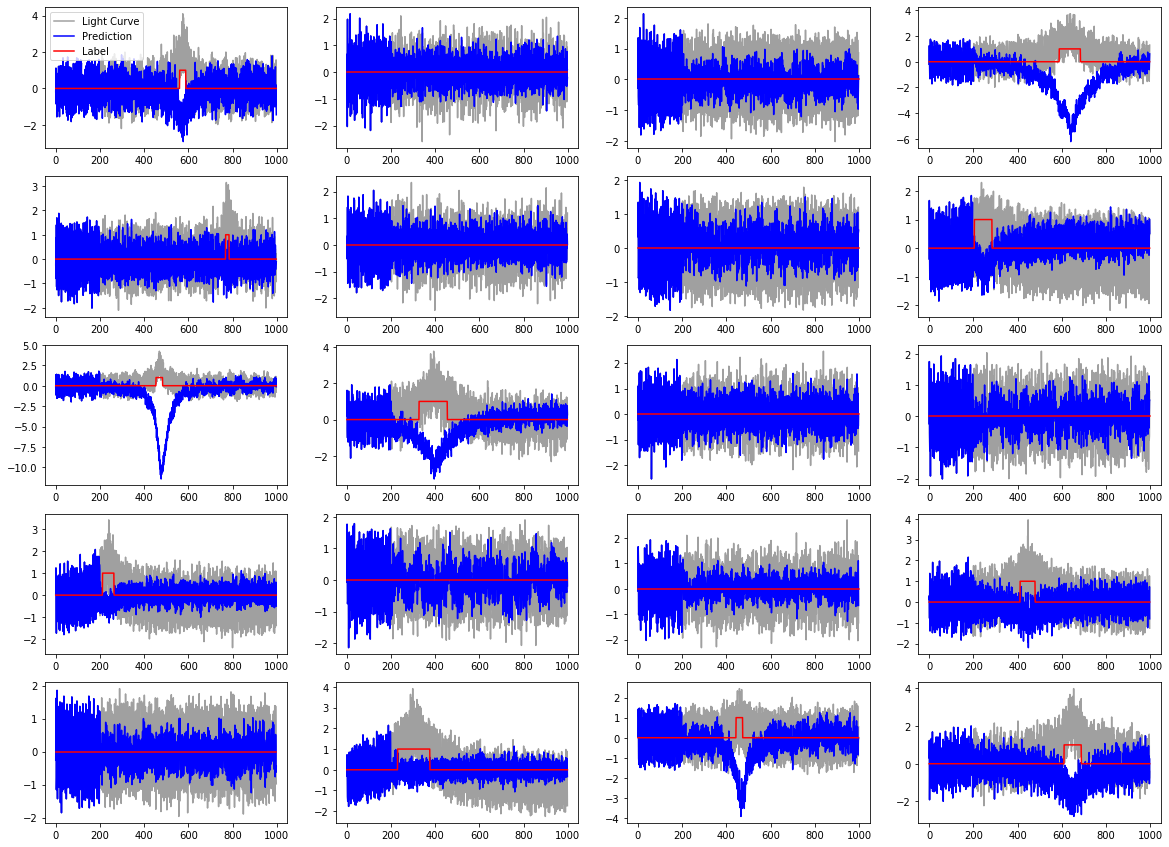

In [0]:
plot = plot_data(X_train,y_train,X_train_arima_0_0_2)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/arima_0_0_2.svg')

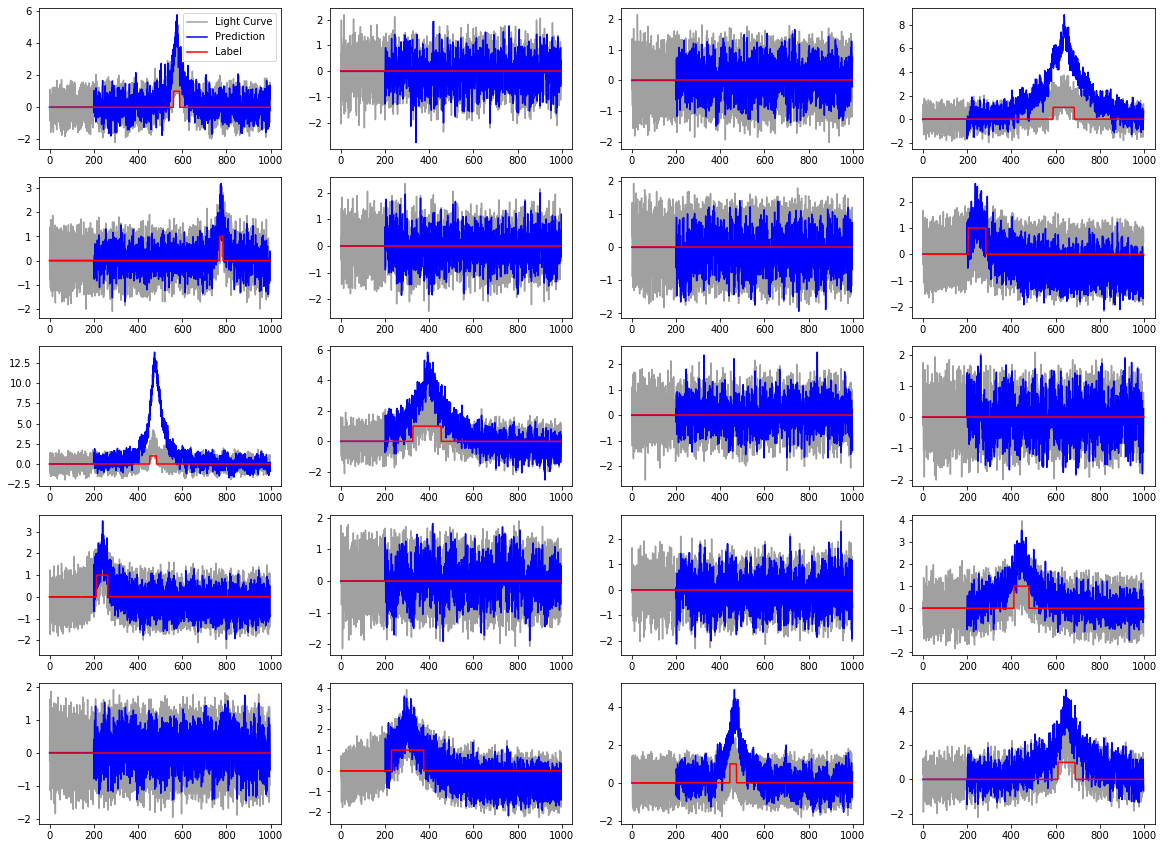

In [0]:
plot = plot_data(X_train,y_train,X_train-X_train_arima_0_0_2)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/arima_0_0_2_res.svg')

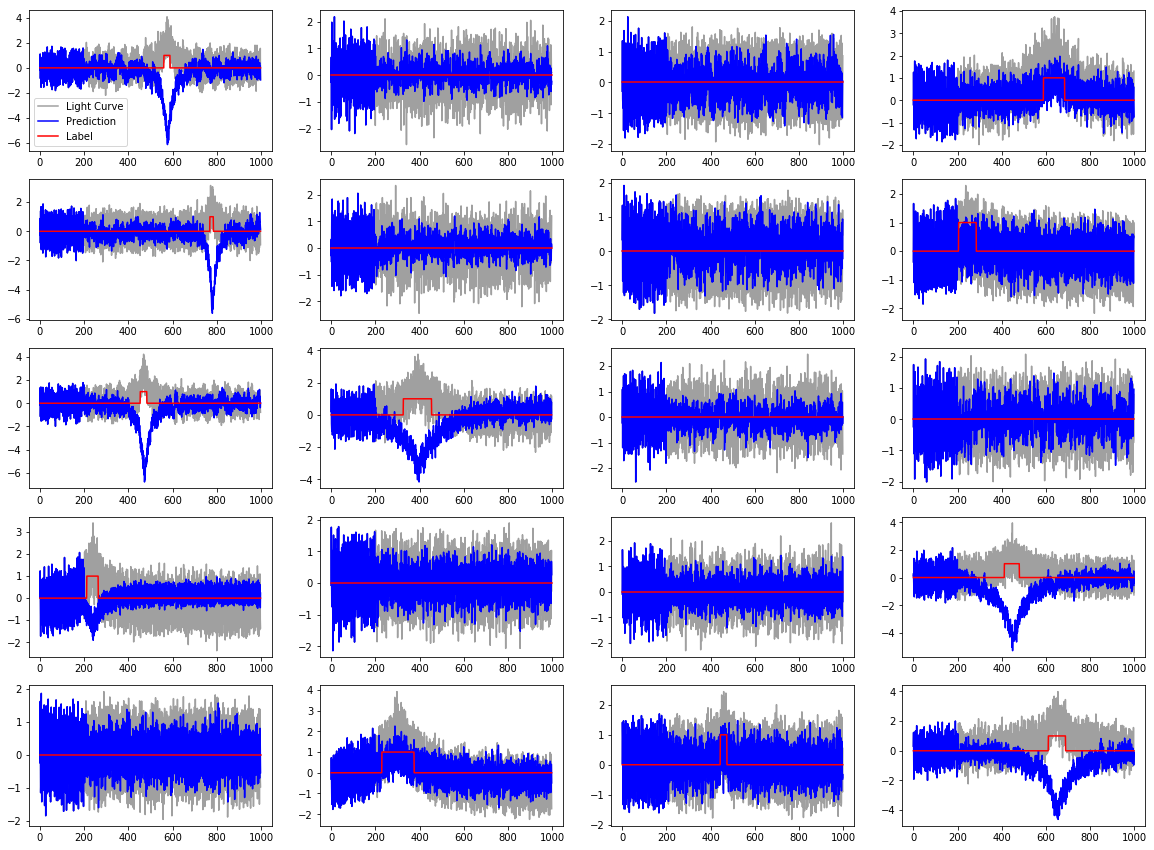

In [0]:
plot = plot_data(X_train,y_train,X_train_arima_0_0_1)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/arima_0_0_1.svg')

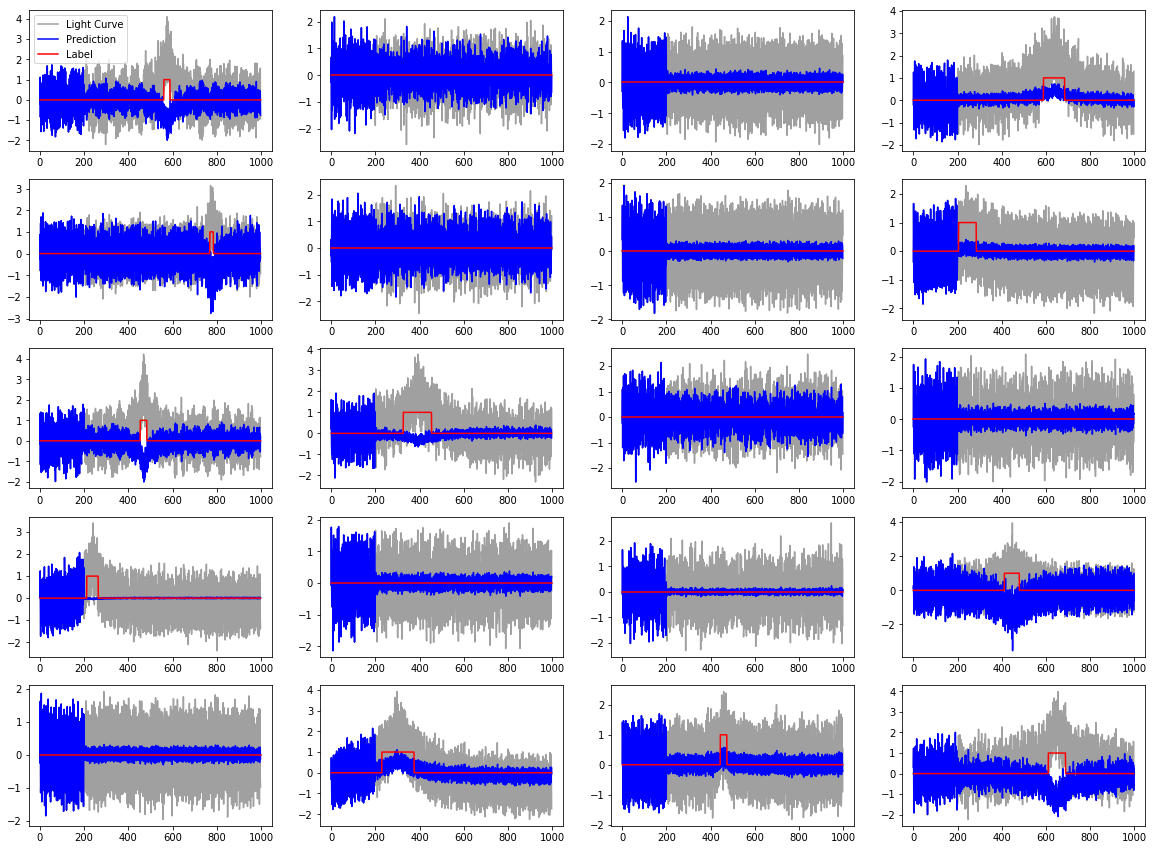

In [0]:
plot = plot_data(X_train,y_train,X_train_arima_1_0_0)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/arima_1_0_0.svg')

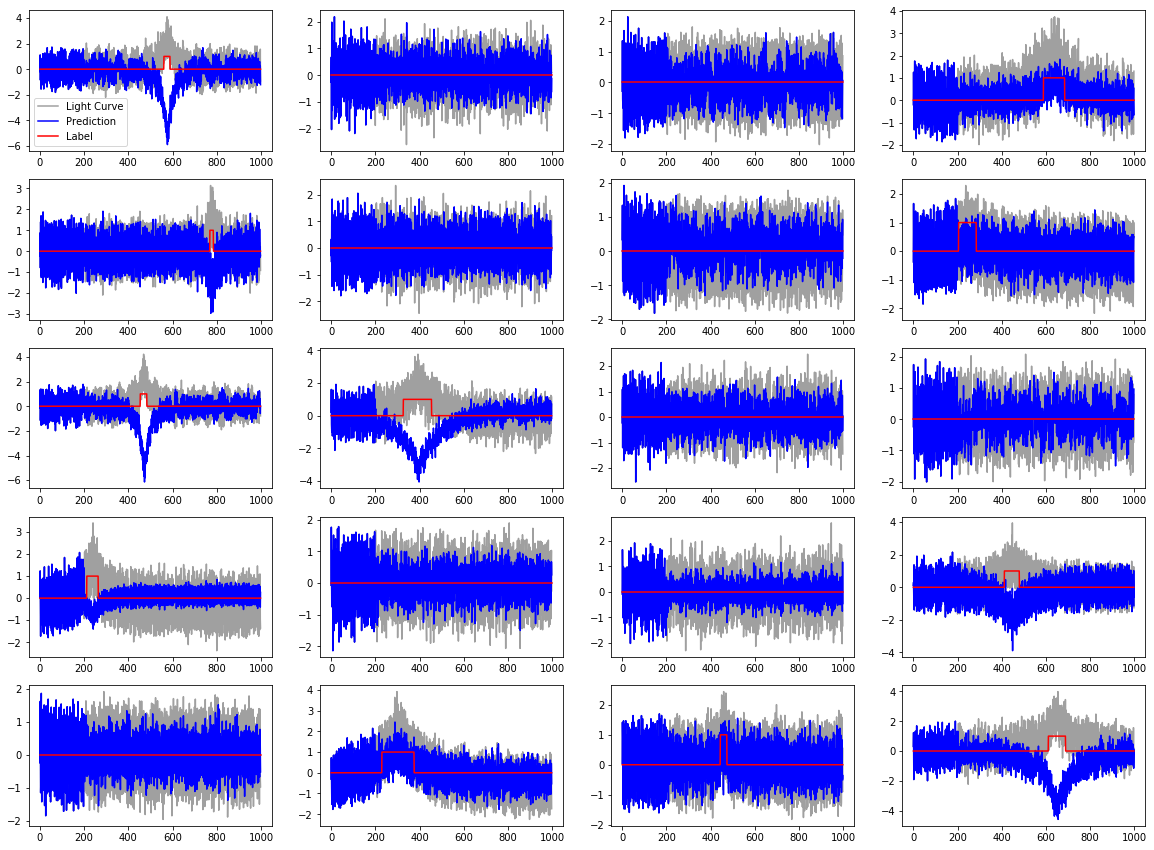

In [0]:
plot = plot_data(X_train,y_train,X_train_arima_1_0_1)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/arima_1_0_1.svg')

In [0]:
plot = plot_data(X_train,y_train,X_train_arima_1_1_1)
plot.savefig('/content/drive/My Drive/pTSA_microlensing/graph_arima/arima_1_1_1.svg')

NameError: ignored

In [7]:
pip install pyflux 

     |████████████████████████████████| 1.3MB 2.7MB/s 
     |████████████████████████████████| 962kB 43.8MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656495 sha256=870c0cd5e54cf2aab7ce8c929848ecc1dd4a0eaba3770285eaefb04774ec5d6f
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux


In [0]:
import matplotlib.pyplot as plt

In [0]:
from tqdm import tqdm
import pyflux as pf
import numpy as np

def generate_arima_predictions(data):
  # data = np.squeeze(data)
  num_dataset = data.shape[0]
  max_t = data.shape[1]
  predict_window = int(0.2 * max_t)
  X_out = np.zeros((num_dataset, max_t, 1))
  
  for i, x in tqdm(enumerate(data)):
    print(x.shape)
    model=pf.ARIMA(data=x,ar=1, integ=0, ma=1, family=pf.Normal())
    model.fit('MLE')
    print(max_t-predict_window)
    hs = model.predict_is(h=(max_t-predict_window))
    # x_sim = np.concatenate((x[:predict_window], hs['Differenced Series']))
    x_sim = np.concatenate((x[:predict_window], hs['Series']))
    X_out[i,:,0] = x_sim
  return X_out

In [0]:
model=pf.ARIMA(data=X_train[0,:,0],ar=0, integ=0, ma=2, family=pf.Normal())
fit = model.fit('MLE')

In [11]:
fit.summary()

Normal ARIMA(0,0,2)                                                                                       
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 2                                           Log Likelihood: -1295.5658                        
End Date: 999                                           AIC: 2599.1316                                    
Number of observations: 998                             BIC: 2618.7546                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.1766     0.0295     5.9865   0.0      (0.1188 | 0.2345)        
MA(1)                                

In [12]:
int(X_gb_events.shape[1] * .8)

6594

In [0]:
result = model.predict_is(int(X_train.shape[1] * .8), fit_once=True, intervals=True)

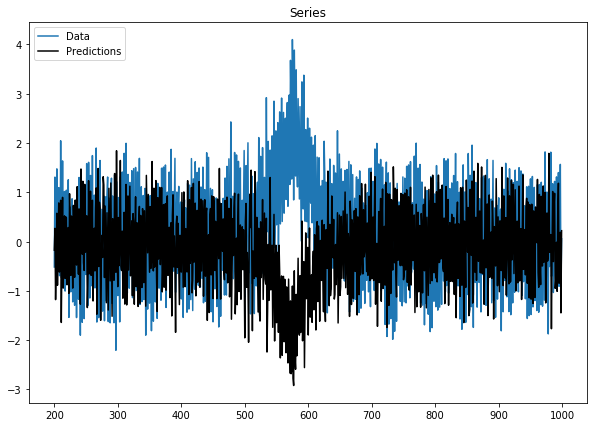

In [20]:
model.plot_predict_is(int(X_train.shape[1] * .8), fit_once=True)

In [0]:
X_gb_events.shape

(103, 8243, 1)

In [0]:
X_gb_events_arima_1_0_1 = generate_arima_predictions(X_gb_events[:10,:,0])
pickle.dump(X_gb_events_arima_1_0_1, open('/content/drive/My Drive/pTSA_microlensing/X_gb_events_arima_1_0_1.p', 'wb'))

0it [00:00, ?it/s]

(8243,)
6595


1it [01:08, 68.98s/it]

(8243,)
6595


2it [02:17, 68.79s/it]

(8243,)
6595


3it [03:25, 68.71s/it]

(8243,)
6595


4it [04:35, 68.94s/it]

(8243,)
6595


5it [05:45, 69.21s/it]

(8243,)
6595


6it [06:55, 69.41s/it]

(8243,)
6595


7it [08:05, 69.61s/it]

(8243,)
6595


8it [09:15, 69.80s/it]

(8243,)
6595


9it [10:25, 69.91s/it]

(8243,)
6595


10it [11:35, 69.85s/it]


In [0]:
X_train_arima_1_1_1 = generate_arima_predictions(X_train[:40,:,0])
# pickle.dump(X_train_arima_0_0_4, open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_0_0_4.p', 'wb'))

# X_test_arima_0_0_4 = generate_arima_predictions(X_test[:,:,0])
# pickle.dump(X_test_arima_0_0_4, open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_0_0_4.p', 'wb'))

# X_dev_arima_0_0_4 = generate_arima_predictions(X_dev[:,:,0])
# pickle.dump(X_dev_arima_0_0_4, open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_0_0_4.p', 'wb'))

0it [00:00, ?it/s]

(1000,)
800


1it [00:02,  2.38s/it]

(1000,)
800


2it [00:04,  2.39s/it]

(1000,)
800


3it [00:07,  2.39s/it]

(1000,)
800


4it [00:09,  2.40s/it]

(1000,)
800


5it [00:12,  2.41s/it]

(1000,)
800


6it [00:14,  2.42s/it]

(1000,)
800


7it [00:16,  2.42s/it]

(1000,)
800


8it [00:19,  2.46s/it]

(1000,)
800


9it [00:21,  2.44s/it]

(1000,)
800


10it [00:24,  2.43s/it]

(1000,)
800


11it [00:26,  2.42s/it]

(1000,)
800


12it [00:29,  2.41s/it]

(1000,)
800


13it [00:31,  2.40s/it]

(1000,)
800


14it [00:33,  2.40s/it]

(1000,)
800


15it [00:36,  2.39s/it]

(1000,)
800


16it [00:38,  2.39s/it]

(1000,)
800


17it [00:40,  2.39s/it]

(1000,)
800


18it [00:43,  2.40s/it]

(1000,)
800


19it [00:45,  2.40s/it]

(1000,)
800


20it [00:48,  2.39s/it]

(1000,)
800


21it [00:50,  2.39s/it]

(1000,)
800


22it [00:52,  2.39s/it]

(1000,)
800


23it [00:55,  2.39s/it]

(1000,)
800


24it [00:57,  2.40s/it]

(1000,)
800


25it [01:00,  2.39s/it]

(1000,)
800


26it [01:02,  2.39s/it]

(1000,)
800


27it [01:04,  2.39s/it]

(1000,)
800


28it [01:07,  2.39s/it]

(1000,)
800


29it [01:09,  2.39s/it]

(1000,)
800


30it [01:12,  2.40s/it]

(1000,)
800


31it [01:14,  2.40s/it]

(1000,)
800


32it [01:16,  2.40s/it]

(1000,)
800


33it [01:19,  2.40s/it]

(1000,)
800


34it [01:21,  2.40s/it]

(1000,)
800


35it [01:24,  2.39s/it]

(1000,)
800


36it [01:26,  2.40s/it]

(1000,)
800


37it [01:28,  2.40s/it]

(1000,)
800


38it [01:31,  2.39s/it]

(1000,)
800


39it [01:33,  2.38s/it]

(1000,)
800


40it [01:36,  2.39s/it]


In [0]:
# pickle.dump(X_train_arima_0_0_1, open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_0_0_1.p', 'wb'))
# pickle.dump(X_test_arima_0_0_1, open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_0_0_1.p', 'wb'))
# pickle.dump(X_dev_arima_0_0_1, open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_0_0_1.p', 'wb'))
# pickle.dump(X_train_arima_0_0_2, open('/content/drive/My Drive/pTSA_microlensing/X_train_arima_0_0_2.p', 'wb'))
# pickle.dump(X_test_arima_0_0_2, open('/content/drive/My Drive/pTSA_microlensing/X_test_arima_0_0_2.p', 'wb'))
# pickle.dump(X_dev_arima_0_0_2, open('/content/drive/My Drive/pTSA_microlensing/X_dev_arima_0_0_2.p', 'wb'))

In [0]:
X_arima.shape

# Injecting the residuals into LSTM 

Building the LSTM model

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow.keras import layers

In [0]:
# Initialising the RNN
rnn_lstm = tf.keras.Sequential()

In [0]:
# Adding the LSTM layers and some Dropout regularisation

# Adding the first layer
rnn_lstm.add(layers.GRU(units=200, return_sequences=True, input_shape=(None, 2)))
rnn_lstm.add(layers.Dropout(0.2))

rnn_lstm.add(layers.GRU(units=100, return_sequences=True, input_shape=(None, 200)))
rnn_lstm.add(layers.Dropout(0.2))

# Output layer
rnn_lstm.add(layers.Dense(units=1, activation='sigmoid'))

In [0]:
# Compiling the RNN
rnn_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', f1_m])
rnn_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 200)         122400    
_________________________________________________________________
dropout (Dropout)            (None, None, 200)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, None, 100)         90600     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
dense (Dense)                (None, None, 1)           101       
Total params: 213,101
Trainable params: 213,101
Non-trainable params: 0
_________________________________________________________________


In [0]:
# X_train_arima = np.concatenate((X_train ,X_train_arima_0_0_1), axis=2)
# X_test_arima = np.concatenate((X_test ,X_test_arima_0_0_1), axis=2)
# X_dev_arima = np.concatenate((X_dev ,X_dev_arima_0_0_1), axis=2)

X_train_arima = np.concatenate((X_train ,X_train_arima_0_0_2), axis=2)
X_test_arima = np.concatenate((X_test ,X_test_arima_0_0_2), axis=2)
X_dev_arima = np.concatenate((X_dev ,X_dev_arima_0_0_2), axis=2)


In [0]:
X_train_arima.shape, X_test_arima.shape, X_dev_arima.shape

((500, 1000, 2), (100, 1000, 2), (100, 2000, 2))

In [0]:
y_train.shape, y_test.shape, y_dev.shape

((500, 1000), (100, 1000), (100, 2000))

In [0]:
# Fitting the RNN to training set
rnn_lstm.fit(X_train_arima, y_train, batch_size=32, epochs=50, validation_data=(X_test_arima, y_test), validation_freq=10,verbose=1, workers=4)

Train on 500 samples, validate on 100 samples
Epoch 1/50
500/500 [==============================] - 9s 18ms/sample - loss: 0.3614 - acc: 0.9241 - f1_m: 0.2923
Epoch 2/50
500/500 [==============================] - 2s 3ms/sample - loss: 0.0796 - acc: 0.9719 - f1_m: 0.6078
Epoch 3/50
500/500 [==============================] - 1s 3ms/sample - loss: 0.0670 - acc: 0.9722 - f1_m: 0.6121
Epoch 4/50
500/500 [==============================] - 1s 3ms/sample - loss: 0.0632 - acc: 0.9730 - f1_m: 0.6290
Epoch 5/50
500/500 [==============================] - 1s 3ms/sample - loss: 0.0633 - acc: 0.9723 - f1_m: 0.6154
Epoch 6/50
500/500 [==============================] - 2s 3ms/sample - loss: 0.0618 - acc: 0.9729 - f1_m: 0.6305
Epoch 7/50
500/500 [==============================] - 2s 3ms/sample - loss: 0.0602 - acc: 0.9727 - f1_m: 0.6355
Epoch 8/50
500/500 [==============================] - 2s 3ms/sample - loss: 0.0602 - acc: 0.9721 - f1_m: 0.6265
Epoch 9/50
500/500 [==============================] - 2s 

In [0]:
rnn_lstm.evaluate(X_dev_arima, y_dev)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.04799304500222206, 0.97677994, 0.5634767]

In [0]:
# # rnn_lstm.save('rnn_lstm_arima')
# rnn_lstm.save("rnn_lstm_arima.h5")
# from keras.models import load_model
 
# # load model
# m = load_model('rnn_lstm_arima.h5')

In [0]:
y_pred=rnn_lstm.predict_proba(X_test_arima)

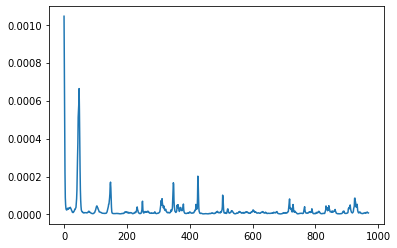

In [0]:
plt.plot(y_pred[4][30:])

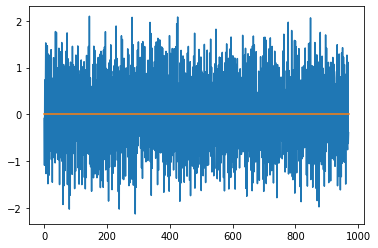

In [0]:
plt.plot(X_test[4,:,0][30:])
plt.plot(y_test[4][30:])

# Evaluation


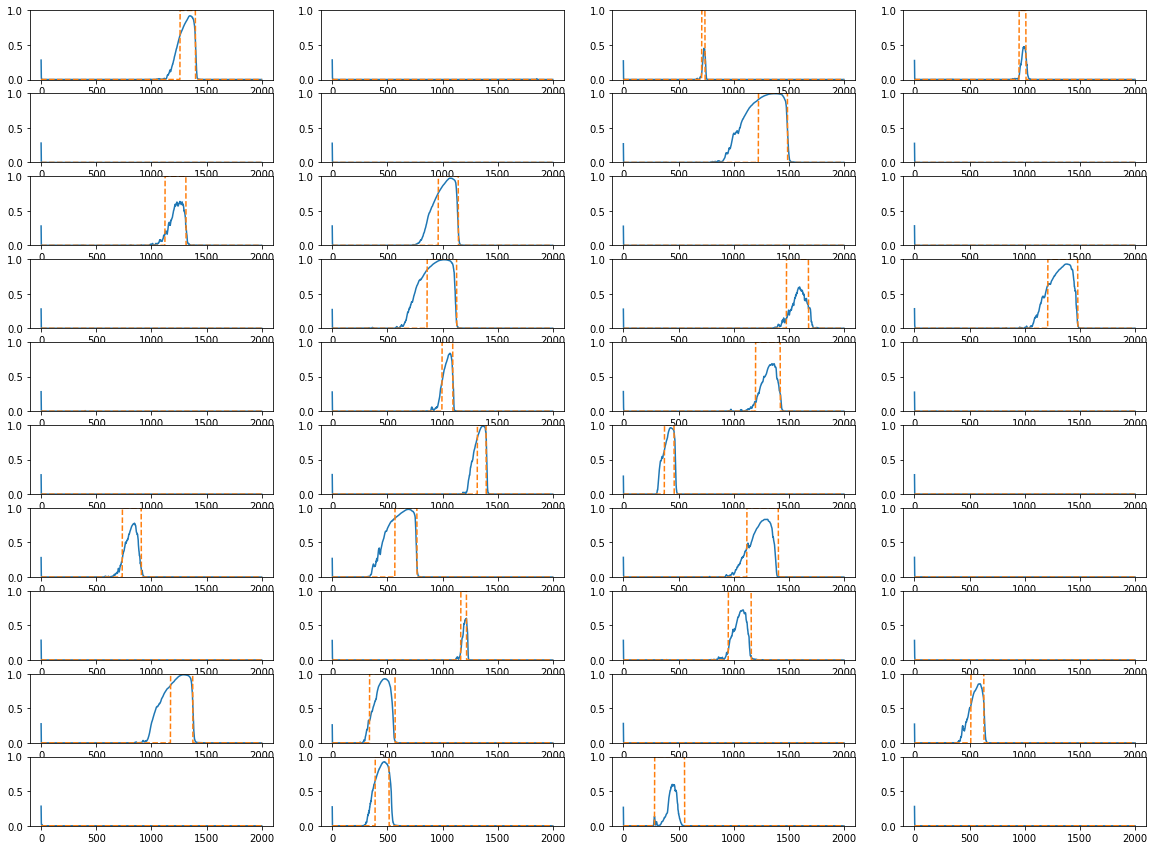

In [0]:
# Generate predictions.
y_pred=rnn_lstm.predict_proba(X_dev_arima)

plt.figure(figsize=(20,15))

for i in range(40):
    plt.subplot(10,4,i+1)
    plt.plot(y_pred[i])
    plt.plot(y_dev[i],'--')
    plt.ylim(0,1)

plt.show()

# Trying on MOA data

In [0]:
import pickle

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# gb18 = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/gb18.pkl', 'rb'))
X_gb = pickle.load(open('/content/drive/My Drive/pTSA_microlensing/X_gb_events.p', 'rb'))

In [0]:
X_gb.shape

(103, 8243, 1)

In [0]:
# def normalize(seq, predict_window):
#     seq_avg = np.mean(seq[:predict_window])
#     seq_std = np.std(seq[:predict_window])
#     seq = (seq - seq_avg) / seq_std
#     return seq

In [0]:
# moa1=np.array(gb18[1][1]['ab_mag'] * -1)
# moa1=moa1[~np.isnan(moa1)]
# moa1 = normalize(moa1, 100)

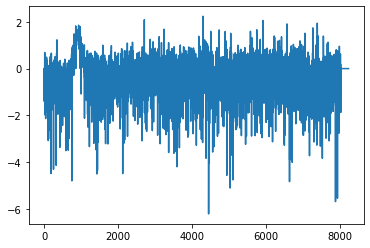

In [0]:
plt.plot(X_gb[0,:,0])

In [0]:
# X_moa = np.array([np.array(list(zip(moa1)))])

In [0]:
# X_moa[:,:,0].shape

In [0]:
X_gb[:1,:,0].shape

(1, 8243)

In [0]:
X_moa_arima_0_0_2 = generate_arima_predictions(X_gb[:5,:,0])

0it [00:00, ?it/s]

(8243,)
6595


1it [00:34, 34.33s/it]

(8243,)
6595


2it [01:08, 34.13s/it]

(8243,)
6595


3it [01:41, 33.96s/it]

(8243,)
6595


4it [02:15, 33.89s/it]

(8243,)
6595


5it [02:48, 33.82s/it]


In [0]:
X_moa_arima = np.concatenate((X_gb[:5,:,:], X_moa_arima_0_0_2), axis=2)

In [0]:
X_moa_arima.shape

(5, 8243, 2)

In [0]:
y_moa_pred = rnn_lstm.predict_proba(X_moa_arima)

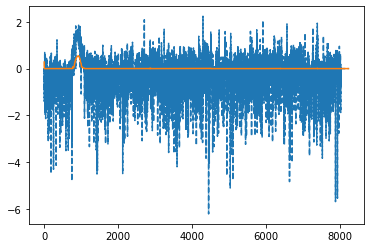

In [0]:
plt.plot(X_gb[0][:,0],'--')
plt.plot(y_moa_pred[0])

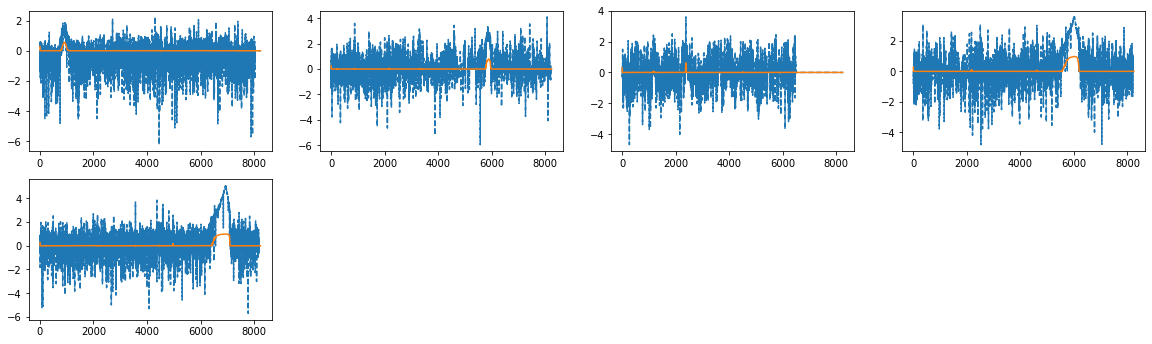

In [0]:
# Generate predictions.
y_moa_pred=rnn_lstm.predict_proba(X_moa_arima)

plt.figure(figsize=(20,15))

for i in range(5):
    plt.subplot(5,4,i+1)
    plt.plot(X_gb[i][:,0],'--')
    plt.plot(y_moa_pred[i])
    # plt.plot(y_dev[i],'--')
    # plt.ylim(0,1)

plt.show()